In [1]:
#Setup
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

plt.rcParams["figure.figsize"] = (20,15)

### **Lab 4: Working with 'real' data**

Getting the Data

In [32]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf.keys()

<KeysViewHDF5 ['data']>

In [33]:
data = np.array(hf.get('data'))
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [34]:
hf.close()

#### **Problem 1**
We are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

##### **1)** Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().


Data is in format

| gps time    | Solar Phase |  Longitude  | Particle Counts |
| ----------- | ----------- | ----------- | -----------     |
|     ...     |     ...     |     ...     |     ...         |

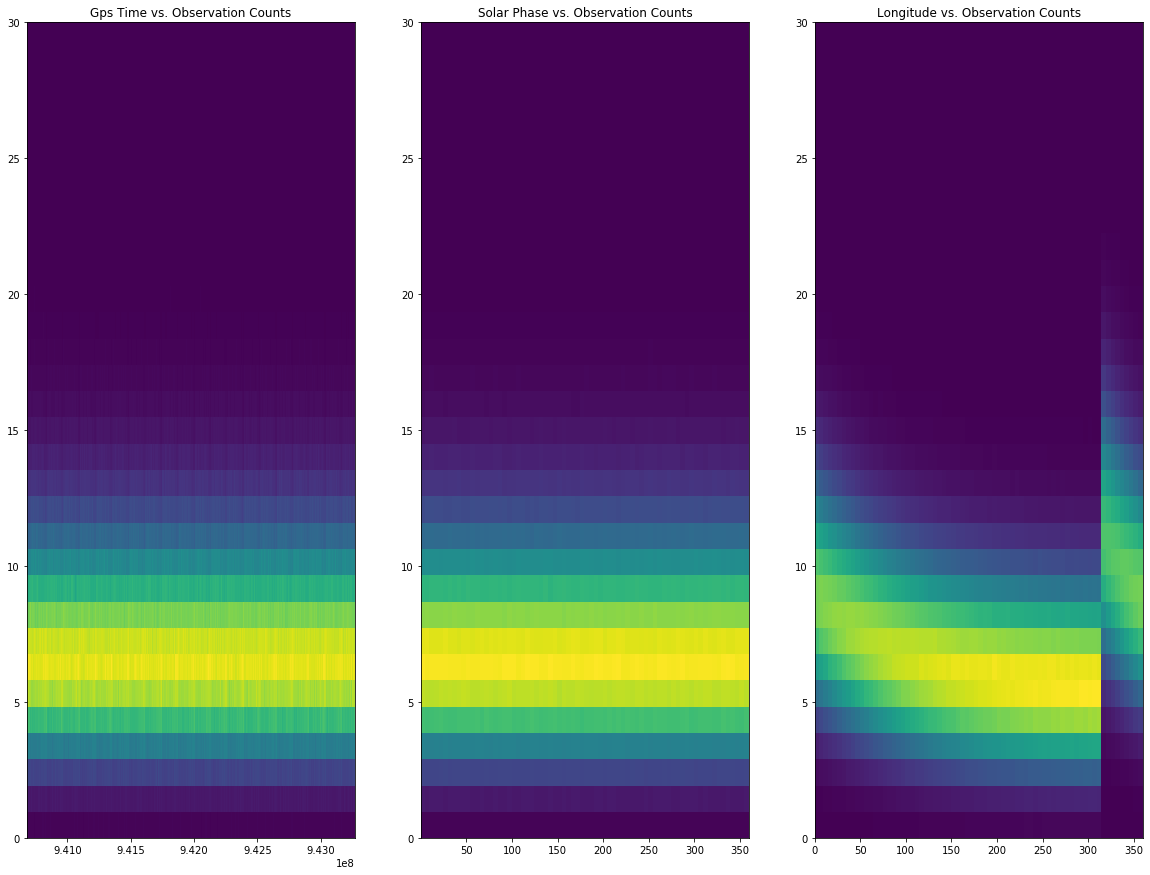

In [5]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.hist2d(data[0],data[3], bins = [500,31])
ax2.hist2d(data[1],data[3], bins = [72,31])
ax3.hist2d(data[2],data[3], bins = [72,31])

ax1.title.set_text('Gps Time vs. Observation Counts')
ax2.title.set_text('Solar Phase vs. Observation Counts')
ax3.title.set_text('Longitude vs. Observation Counts')
plt.show()

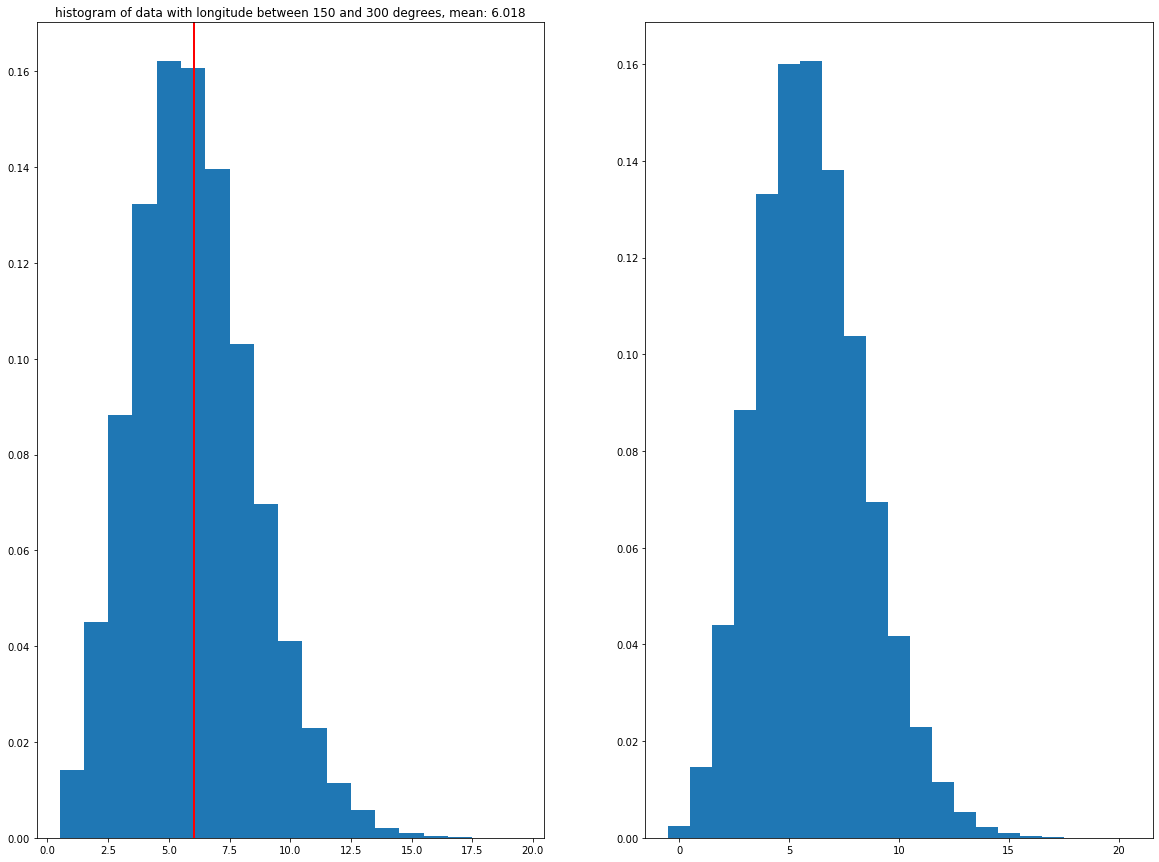

In [6]:
a = data[2][:200000]>150
b = data[2][:200000]<300
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data[3][:200000][np.logical_and(a,b)], bins = np.arange(0.5,20.5,1), density = True)
mu = np.mean(data[3][:200000][np.logical_and(a,b)])
ax1.axvline(mu, linewidth = 2, color = 'red')
ax1.title.set_text('histogram of data with longitude between 150 and 300 degrees, mean: '+ str(np.round(mu,3)))
x = range(0,21)
ax2.bar(x, stats.poisson.pmf(x,mu), width = 1)
plt.show()

The distribution is roughly poisson distributed as seen in the 2d histograms above. When data is pulled from longitude values between 150 and 300, where the distribution looks relatively constant, it forms a poisson distribution with a mean just greater than 6. Solar phase has no noticable impact on the background distribution, but the longitude does have a noticable difference. The distribution is relatively constant between 150 degrees to around 300 degrees, but at about 320 degrees the mean jumps up and slowly decreases as the phase aproaches 150 again. The discontinuity in the 2d histogram of longitude versus observation counts appears to be signal contamination.

##### **2)** The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.

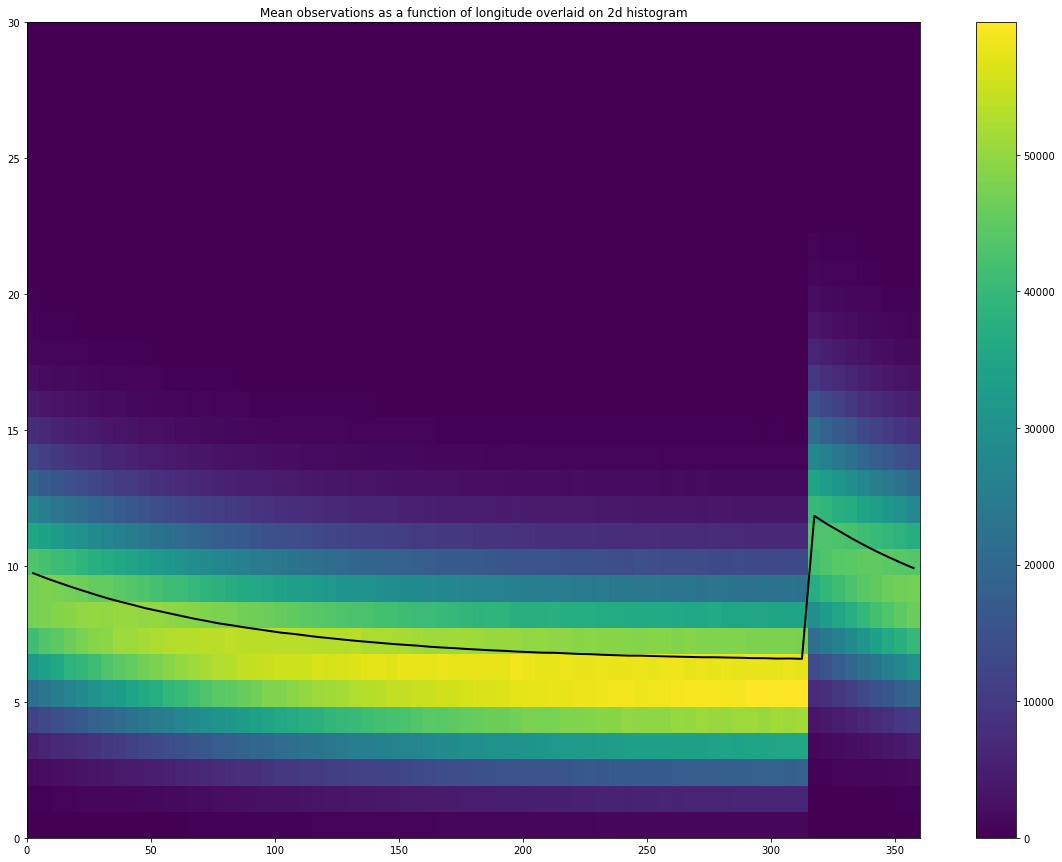

In [7]:
blocks = plt.hist2d(data[2],data[3], bins = [72,31])
mean = np.zeros(72)
for i in range(0,72):
    mean[i] = sum(blocks[2][1:]*blocks[0][i,:]/sum(blocks[0][i,:]))
plt.plot(blocks[1][1:]-2.5,mean, linewidth = 2, color = 'black')
plt.title('Mean observations as a function of longitude overlaid on 2d histogram')
plt.colorbar()
plt.show()

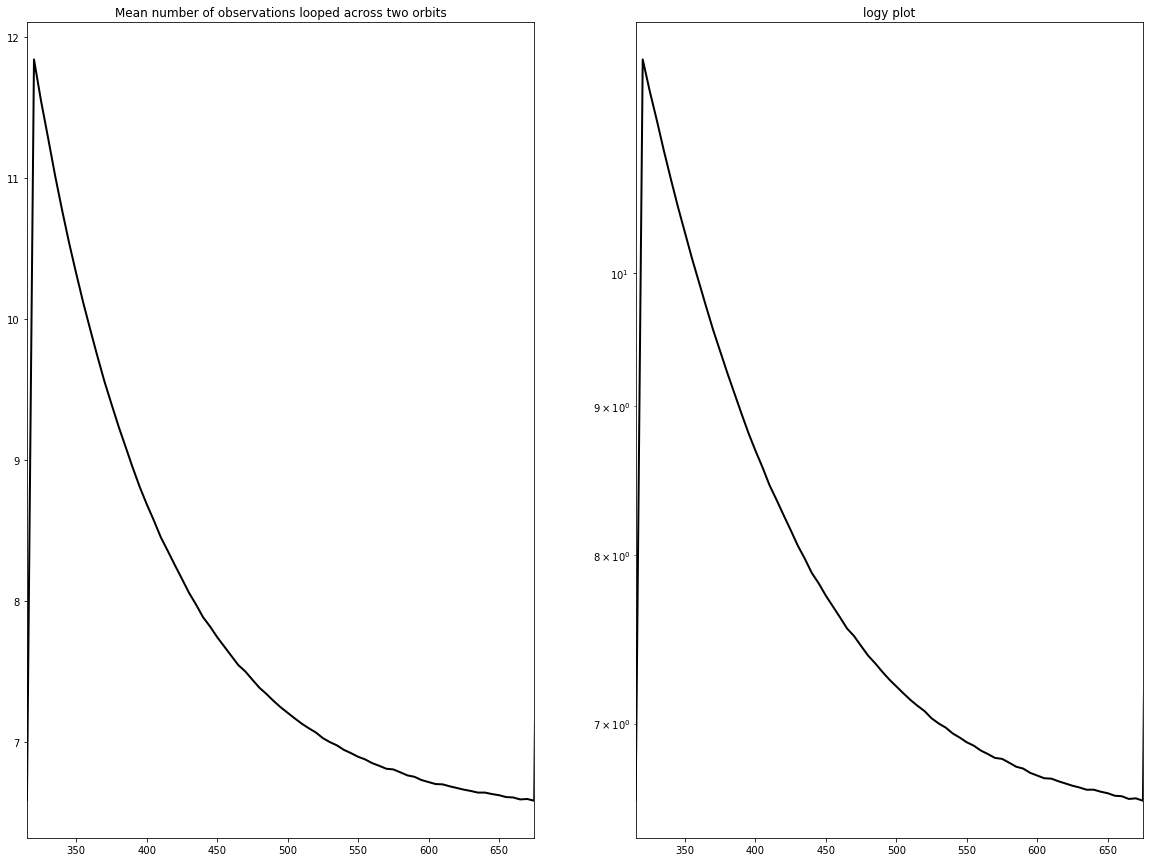

In [8]:
fig,(ax1, ax2) = plt.subplots(1,2)
ax1.plot(np.append(blocks[1][1:],blocks[1][1:]+360),np.append(mean,mean), linewidth = 2, color = 'black')
ax1.title.set_text('Mean number of observations looped across two orbits')
ax1.set_xlim([315,675])
ax2.plot(np.append(blocks[1][1:],blocks[1][1:]+360),np.append(mean,mean), linewidth = 2, color = 'black')
ax2.title.set_text('logy plot')
ax2.set_yscale('log')
ax2.set_xlim([315,675])
plt.show()

As described in the previous part, the background has a longitudinal dependance. Above I have plotted the mean number of observations in each horizontal bin, and this creates a function with an average for every 5 degree increment. This could become more accurate if more horizontal bins were used. The mean seams to decay somewhat exponentially, which is made more obvious through the looping of the mean over two periods. Using a log y scale however it is evident that the function is only exponential looking.

##### **3)** Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

$$P_{k obs}(\phi) = \frac{\lambda(\phi)^k e^{-\lambda(\phi)}}{k!}$$

where $\phi$ is the longitude


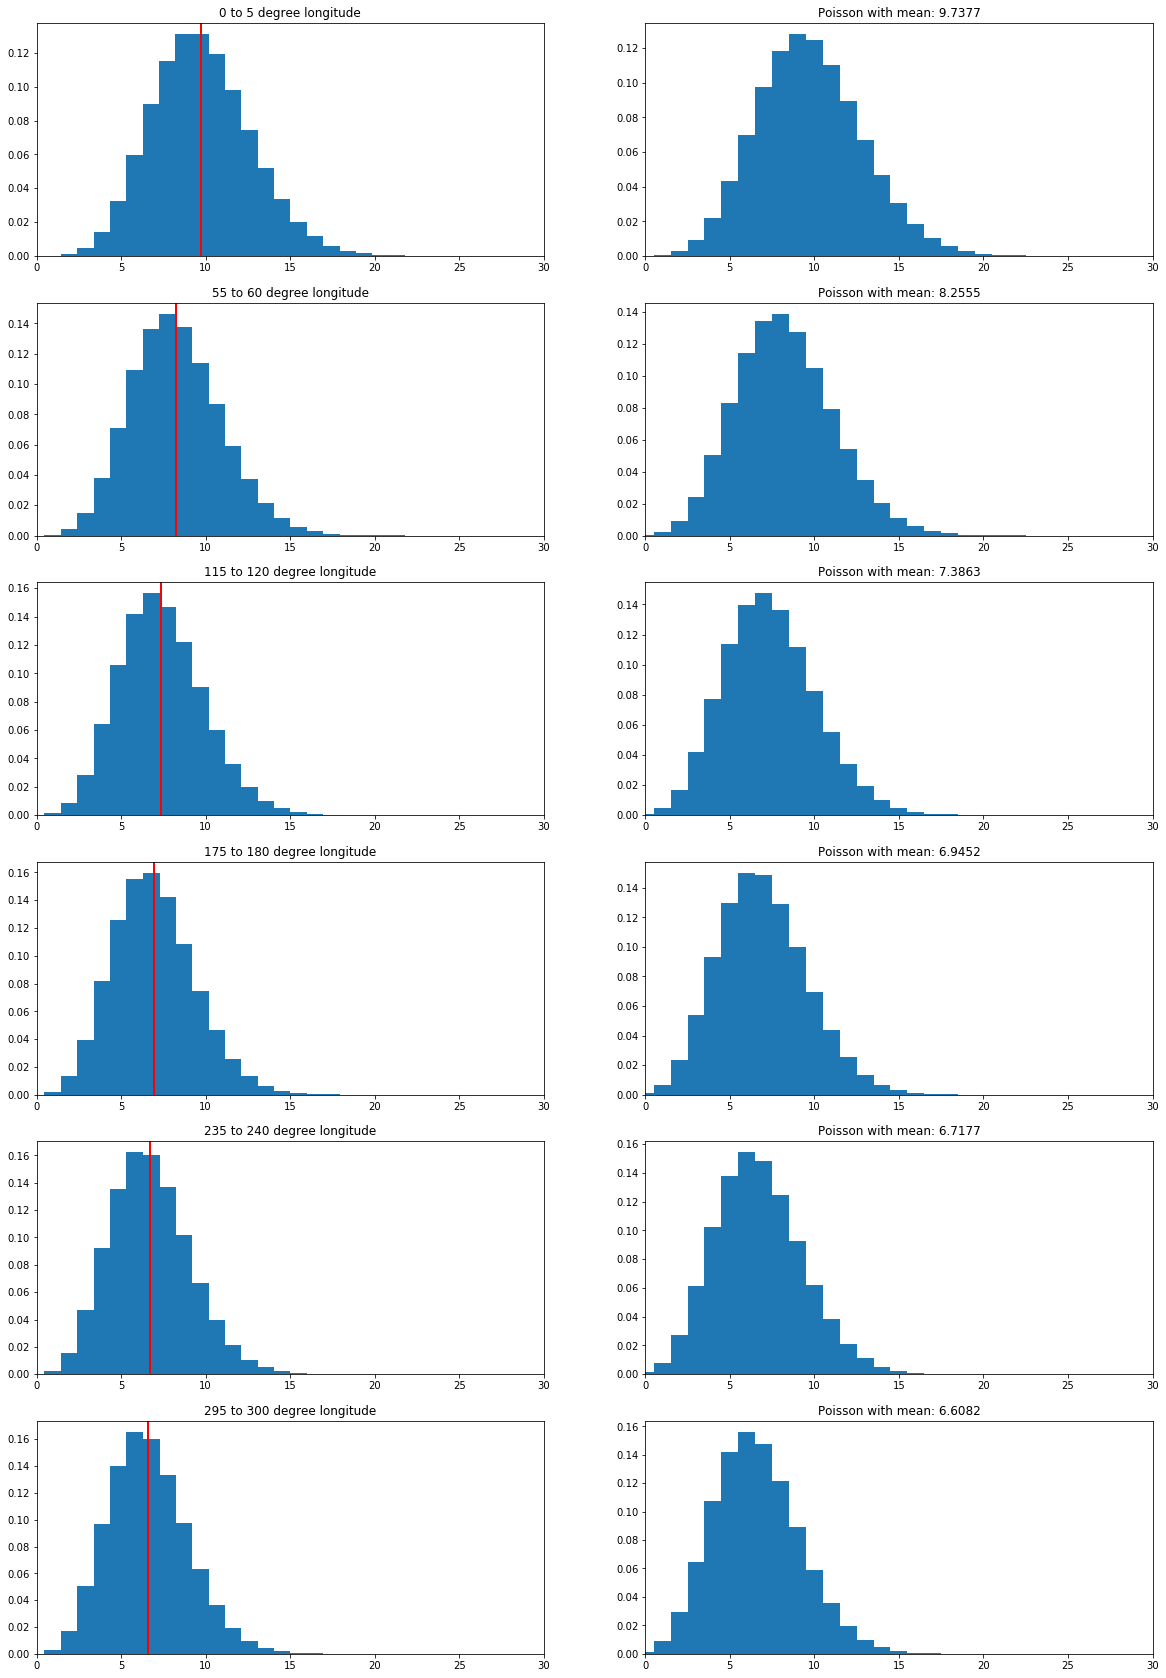

In [9]:
plt.rcParams["figure.figsize"] = (20,30)
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(6,2)
x = range(0,25)

n = 0
ax1.bar(blocks[2][1:],blocks[0][n,:]/sum(blocks[0][n,:]), width = 1)
ax2.bar(x,stats.poisson.pmf(x,mean[n]),width = 1)
ax1.set_xlim([0,30])
ax1.axvline(mean[n], color = 'red', linewidth = 2)
ax2.set_xlim([0,30])
ax1.title.set_text('0 to 5 degree longitude')
ax2.title.set_text('Poisson with mean: ' + str(np.round(mean[n],4)))

n = 11
ax3.bar(blocks[2][1:],blocks[0][n,:]/sum(blocks[0][n,:]), width = 1)
ax4.bar(x,stats.poisson.pmf(x,mean[n]),width = 1)
ax3.axvline(mean[n], color = 'red', linewidth = 2)
ax3.set_xlim([0,30])
ax4.set_xlim([0,30])
ax3.title.set_text('55 to 60 degree longitude')
ax4.title.set_text('Poisson with mean: ' + str(np.round(mean[n],4)))

n = 23
ax5.bar(blocks[2][1:],blocks[0][n,:]/sum(blocks[0][n,:]), width = 1)
ax6.bar(x,stats.poisson.pmf(x,mean[n]),width = 1)
ax5.axvline(mean[n], color = 'red', linewidth = 2)
ax5.set_xlim([0,30])
ax6.set_xlim([0,30])
ax5.title.set_text('115 to 120 degree longitude')
ax6.title.set_text('Poisson with mean: ' + str(np.round(mean[n],4)))

n = 35
ax7.bar(blocks[2][1:],blocks[0][n,:]/sum(blocks[0][n,:]), width = 1)
ax8.bar(x,stats.poisson.pmf(x,mean[n]),width = 1)
ax7.axvline(mean[n], color = 'red', linewidth = 2)
ax7.set_xlim([0,30])
ax8.set_xlim([0,30])
ax7.title.set_text('175 to 180 degree longitude')
ax8.title.set_text('Poisson with mean: ' + str(np.round(mean[n],4)))

n = 47
ax9.bar(blocks[2][1:],blocks[0][n,:]/sum(blocks[0][n,:]), width = 1)
ax10.bar(x,stats.poisson.pmf(x,mean[n]),width = 1)
ax9.axvline(mean[n], color = 'red', linewidth = 2)
ax9.set_xlim([0,30])
ax10.set_xlim([0,30])
ax9.title.set_text('235 to 240 degree longitude')
ax10.title.set_text('Poisson with mean: ' + str(np.round(mean[n],4)))

n = 59
ax11.bar(blocks[2][1:],blocks[0][n,:]/sum(blocks[0][n,:]), width = 1)
ax12.bar(x,stats.poisson.pmf(x,mean[n]),width = 1)
ax11.axvline(mean[n], color = 'red', linewidth = 2)
ax11.set_xlim([0,30])
ax12.set_xlim([0,30])
ax11.title.set_text('295 to 300 degree longitude')
ax12.title.set_text('Poisson with mean: ' + str(np.round(mean[n],4)))

plt.show()

The plots above show slices from the 2d histogram of longitude versus number of observations, as compared to a poisson distribution with a mean corresponding to the mean of that slice. The general shape of the plots is close in all of the cases, variation could come from each slice representing a range of $5^{\circ}$. The line overlay is the mean of the corresponding poisson from the background distribution model.
##### **4)** Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

In [10]:
prob_5sigma = stats.norm.cdf(5)
stats.poisson.ppf(prob_5sigma,mean[0])
print('Threshold for 5 sigma between 0 and 5 degrees longitude is:',stats.poisson.ppf(prob_5sigma,mean[0]), 'gamma ray bursts in 100 milliseconds')

print('Threshold for 5 sigma between 55 and 60 degrees longitude is:',stats.poisson.ppf(prob_5sigma,mean[11]), 'gamma ray bursts in 100 milliseconds')

print('Threshold for 5 sigma between 115 and 120 degrees longitude is:',stats.poisson.ppf(prob_5sigma,mean[23]), 'gamma ray bursts in 100 milliseconds')

print('Threshold for 5 sigma between 175 and 180 degrees longitude is:',stats.poisson.ppf(prob_5sigma,mean[35]), 'gamma ray bursts in 100 milliseconds')

print('Threshold for 5 sigma between 235 and 240 degrees longitude is:',stats.poisson.ppf(prob_5sigma,mean[47]), 'gamma ray bursts in 100 milliseconds')

print('Threshold for 5 sigma between 295 and 300 degrees longitude is:',stats.poisson.ppf(prob_5sigma,mean[59]), 'gamma ray bursts in 100 milliseconds')

print('Threshold for 5 sigma between 355 and 360 degrees longitude is:',stats.poisson.ppf(prob_5sigma,mean[71]), 'gamma ray bursts in 100 milliseconds')

Threshold for 5 sigma between 0 and 5 degrees longitude is: 29.0 gamma ray bursts in 100 milliseconds
Threshold for 5 sigma between 55 and 60 degrees longitude is: 26.0 gamma ray bursts in 100 milliseconds
Threshold for 5 sigma between 115 and 120 degrees longitude is: 24.0 gamma ray bursts in 100 milliseconds
Threshold for 5 sigma between 175 and 180 degrees longitude is: 24.0 gamma ray bursts in 100 milliseconds
Threshold for 5 sigma between 235 and 240 degrees longitude is: 23.0 gamma ray bursts in 100 milliseconds
Threshold for 5 sigma between 295 and 300 degrees longitude is: 23.0 gamma ray bursts in 100 milliseconds
Threshold for 5 sigma between 355 and 360 degrees longitude is: 29.0 gamma ray bursts in 100 milliseconds


#### **Problem 2**
Looking for transient signal

##### **1)** Download Data

In [44]:
hf = h5py.File('images.h5', 'r')
hf.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [45]:
images = np.array(hf.get('imagestack'))
image1 = np.array(hf.get('image1'))
hf.close()

##### **2)** Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

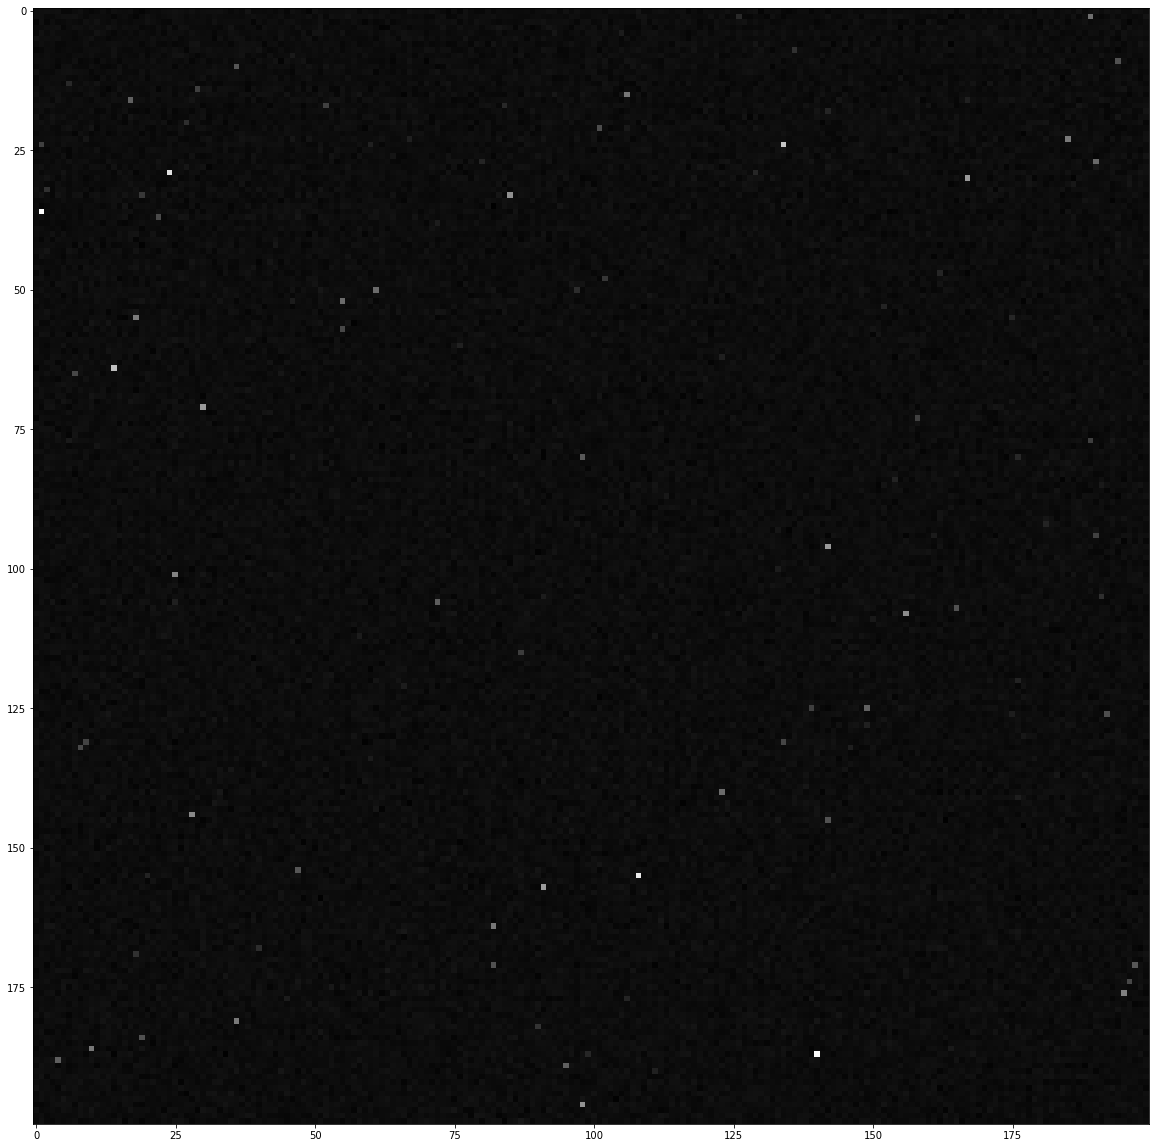

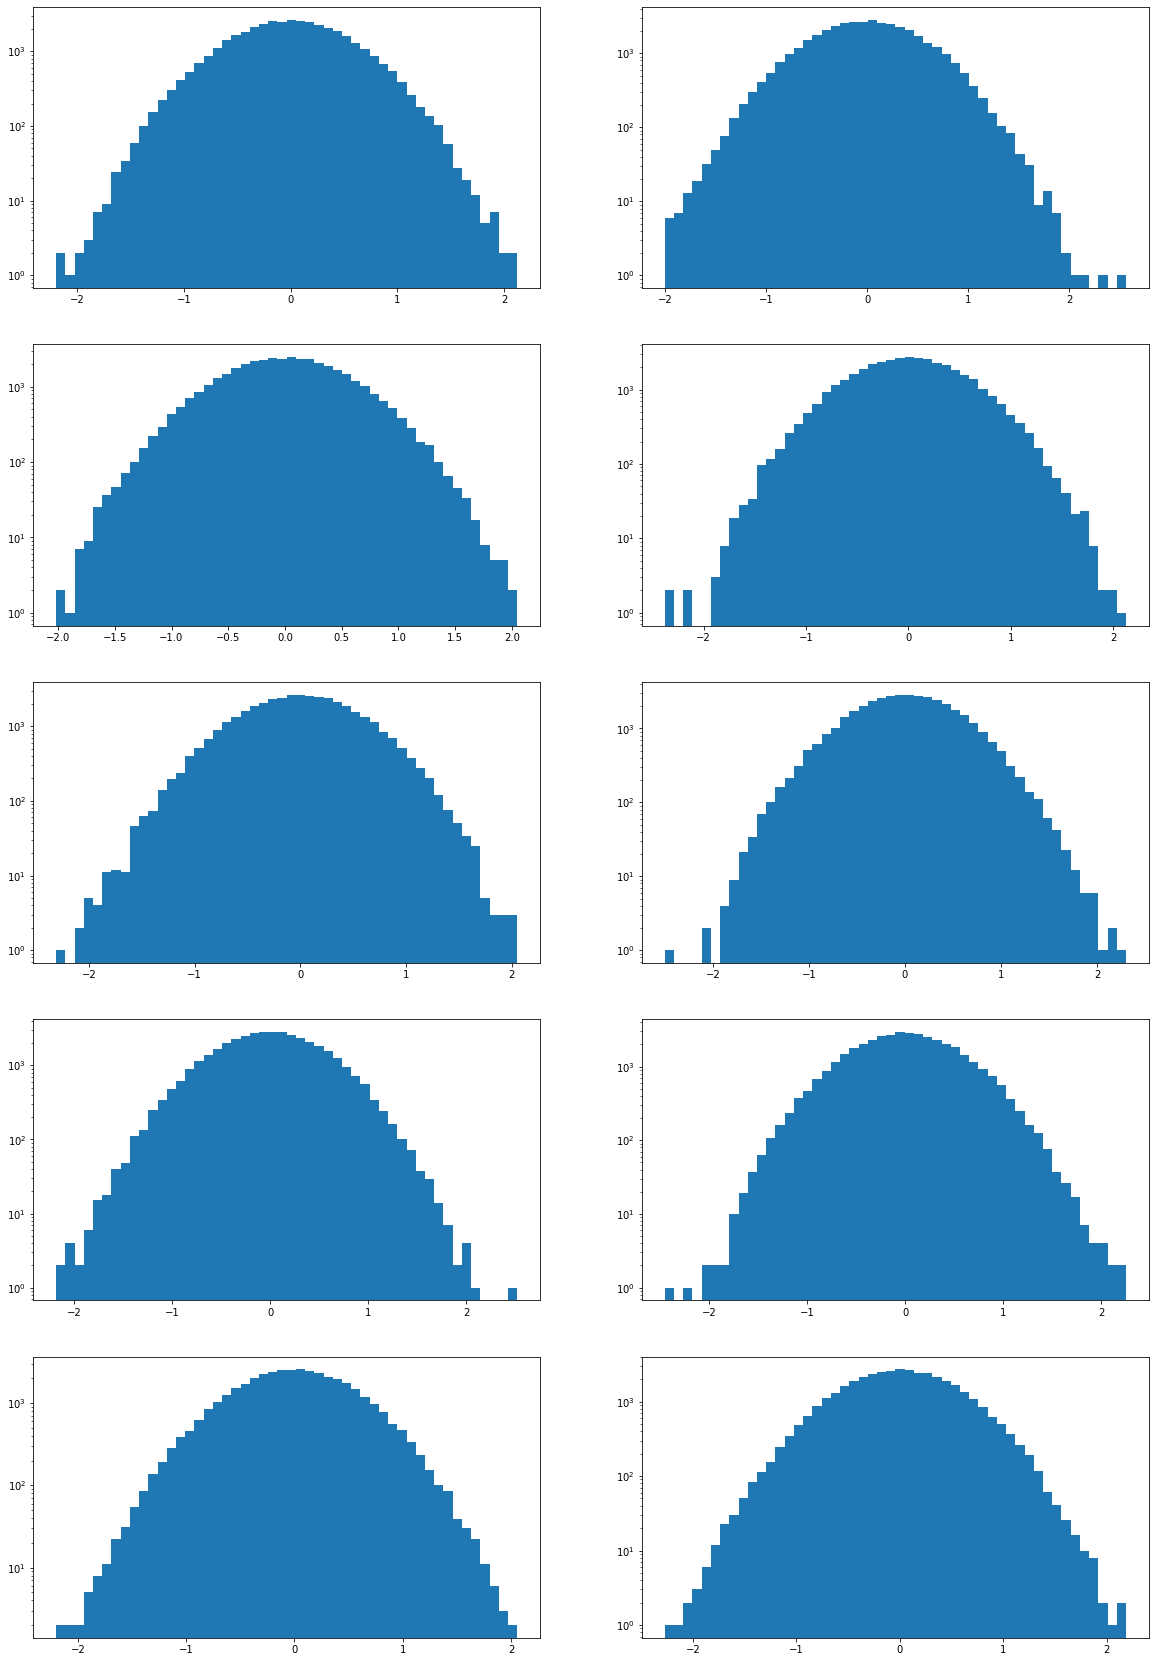

46.01175269422071

In [13]:
fig1, ax = plt.subplots(1,1)
fig2, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(5,2)
np.shape(images)
mean = images.sum(axis = 2)/10
plt. rcParams["image.cmap"] = 'gray'
ax.imshow(images[:,:,1])


n = 0
ax1.hist(np.reshape(images[:,:,n]-mean,40000), bins = 50)
ax1.set_yscale('log')

n = 1
ax2.hist(np.reshape(images[:,:,n]-mean,40000), bins = 50)
ax2.set_yscale('log')

n = 2
ax3.hist(np.reshape(images[:,:,n]-mean,40000), bins = 50)
ax3.set_yscale('log')

n = 3
ax4.hist(np.reshape(images[:,:,n]-mean,40000), bins = 50)
ax4.set_yscale('log')

n = 4
ax5.hist(np.reshape(images[:,:,n]-mean,40000), bins = 50)
ax5.set_yscale('log')

n=5
ax6.hist(np.reshape(images[:,:,n]-mean,40000), bins = 50)
ax6.set_yscale('log')

n=6
ax7.hist(np.reshape(images[:,:,n]-mean,40000), bins = 50)
ax7.set_yscale('log')

n=7
ax8.hist(np.reshape(images[:,:,n]-mean,40000), bins = 50)
ax8.set_yscale('log')

n=8
ax9.hist(np.reshape(images[:,:,n]-mean,40000), bins = 50)
ax9.set_yscale('log')

n=9
ax10.hist(np.reshape(images[:,:,n]-mean,40000), bins = 50)
ax10.set_yscale('log')

plt.show()
np.max(images[:,:,0])

3.8911803223819916 21225


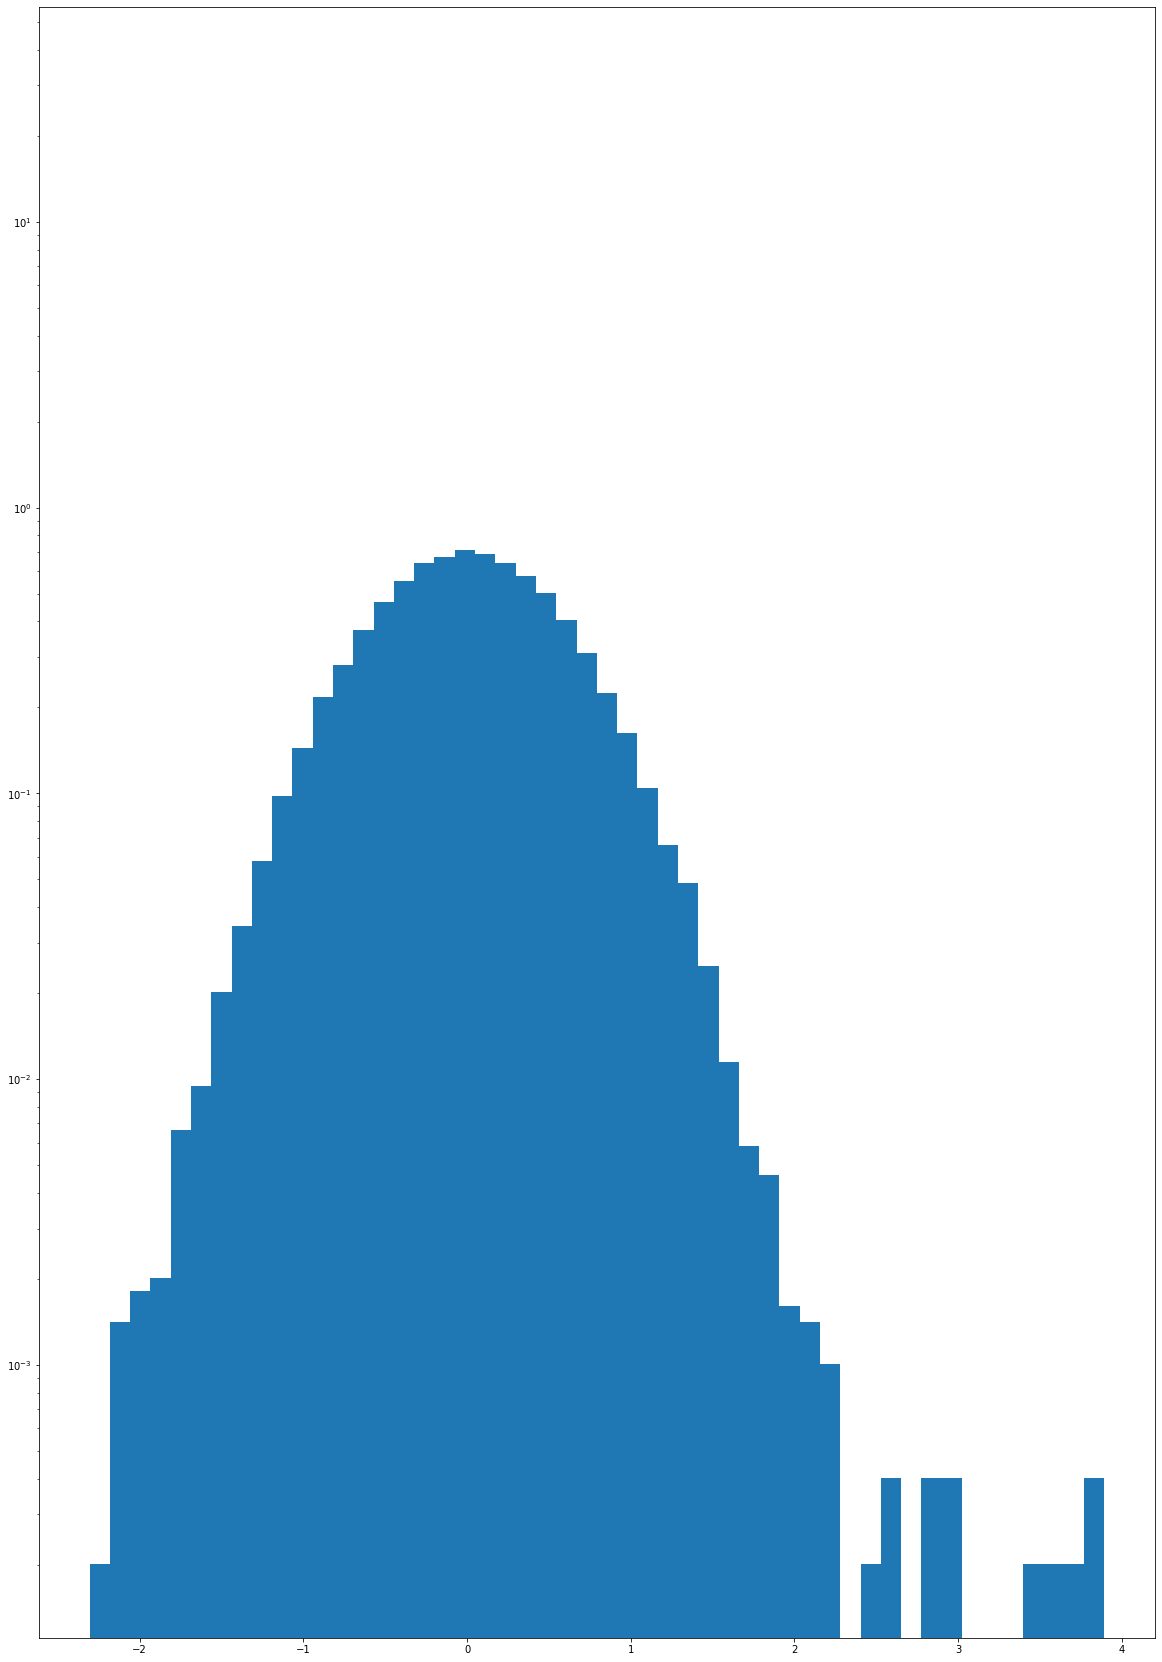

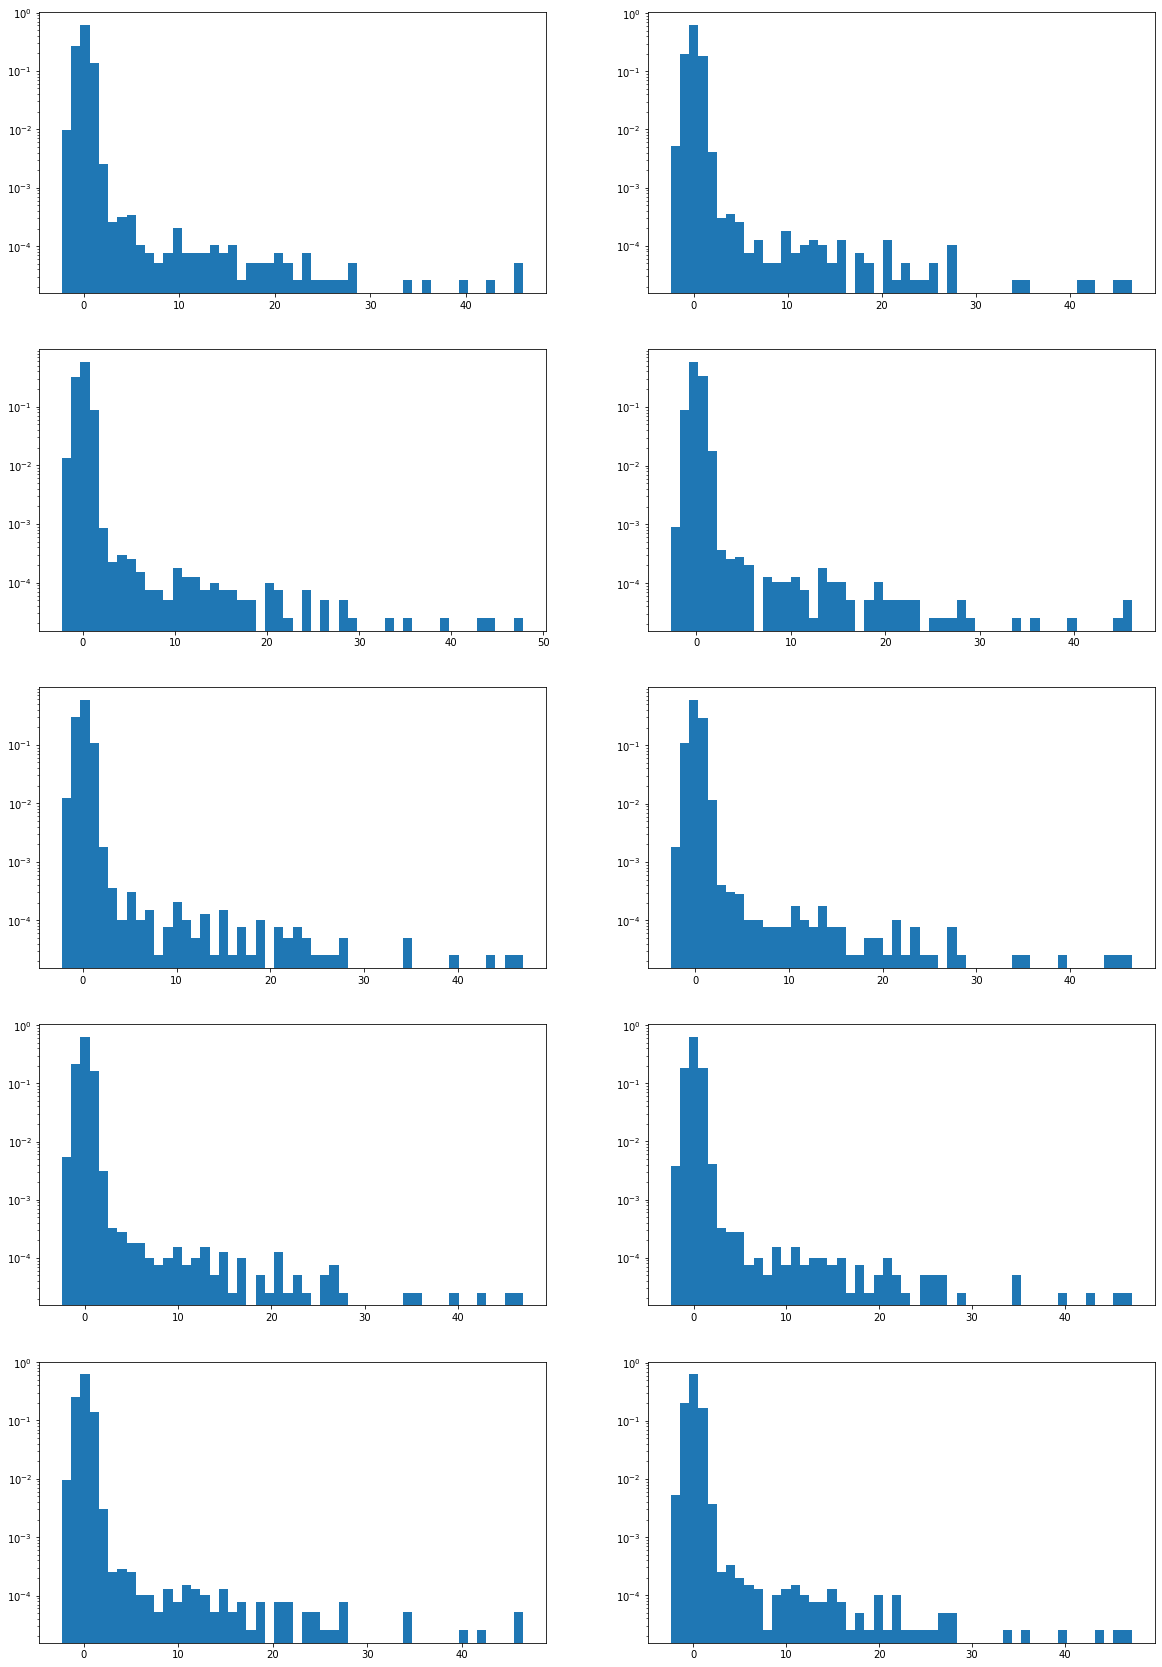

In [61]:
fig1, ax = plt.subplots(1,1)
fig2, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10)) = plt.subplots(5,2)
detection = np.max(image1-mean)
print(np.max(image1-mean),np.argmax(image1-mean))
ax.hist(np.reshape(image1-mean,40000), bins = 50, density = True)
x = np.arange(0,50,1000)
ax.plot(x,stats.expon.pdf(x,scale = np.mean(mean)),linewidth = 12, color = 'black')
ax.set_yscale('log')
n = 0
ax1.hist(np.reshape(images[:,:,n],40000), bins = 50, density = True)
ax1.set_yscale('log')

n = 1
ax2.hist(np.reshape(images[:,:,n],40000), bins = 50, density = True)
ax2.set_yscale('log')

n = 2
ax3.hist(np.reshape(images[:,:,n],40000), bins = 50, density = True)
ax3.set_yscale('log')

n = 3
ax4.hist(np.reshape(images[:,:,n],40000), bins = 50, density = True)
ax4.set_yscale('log')

n = 4
ax5.hist(np.reshape(images[:,:,n],40000), bins = 50, density = True)
ax5.set_yscale('log')

n=5
ax6.hist(np.reshape(images[:,:,n],40000), bins = 50, density = True)
ax6.set_yscale('log')

n=6
ax7.hist(np.reshape(images[:,:,n],40000), bins = 50, density = True)
ax7.set_yscale('log')

n=7
ax8.hist(np.reshape(images[:,:,n],40000), bins = 50, density = True)
ax8.set_yscale('log')

n=8
ax9.hist(np.reshape(images[:,:,n],40000), bins = 50, density = True)
ax9.set_yscale('log')

n=9
ax10.hist(np.reshape(images[:,:,n],40000), bins = 50, density = True)
ax10.set_yscale('log')

plt.show()

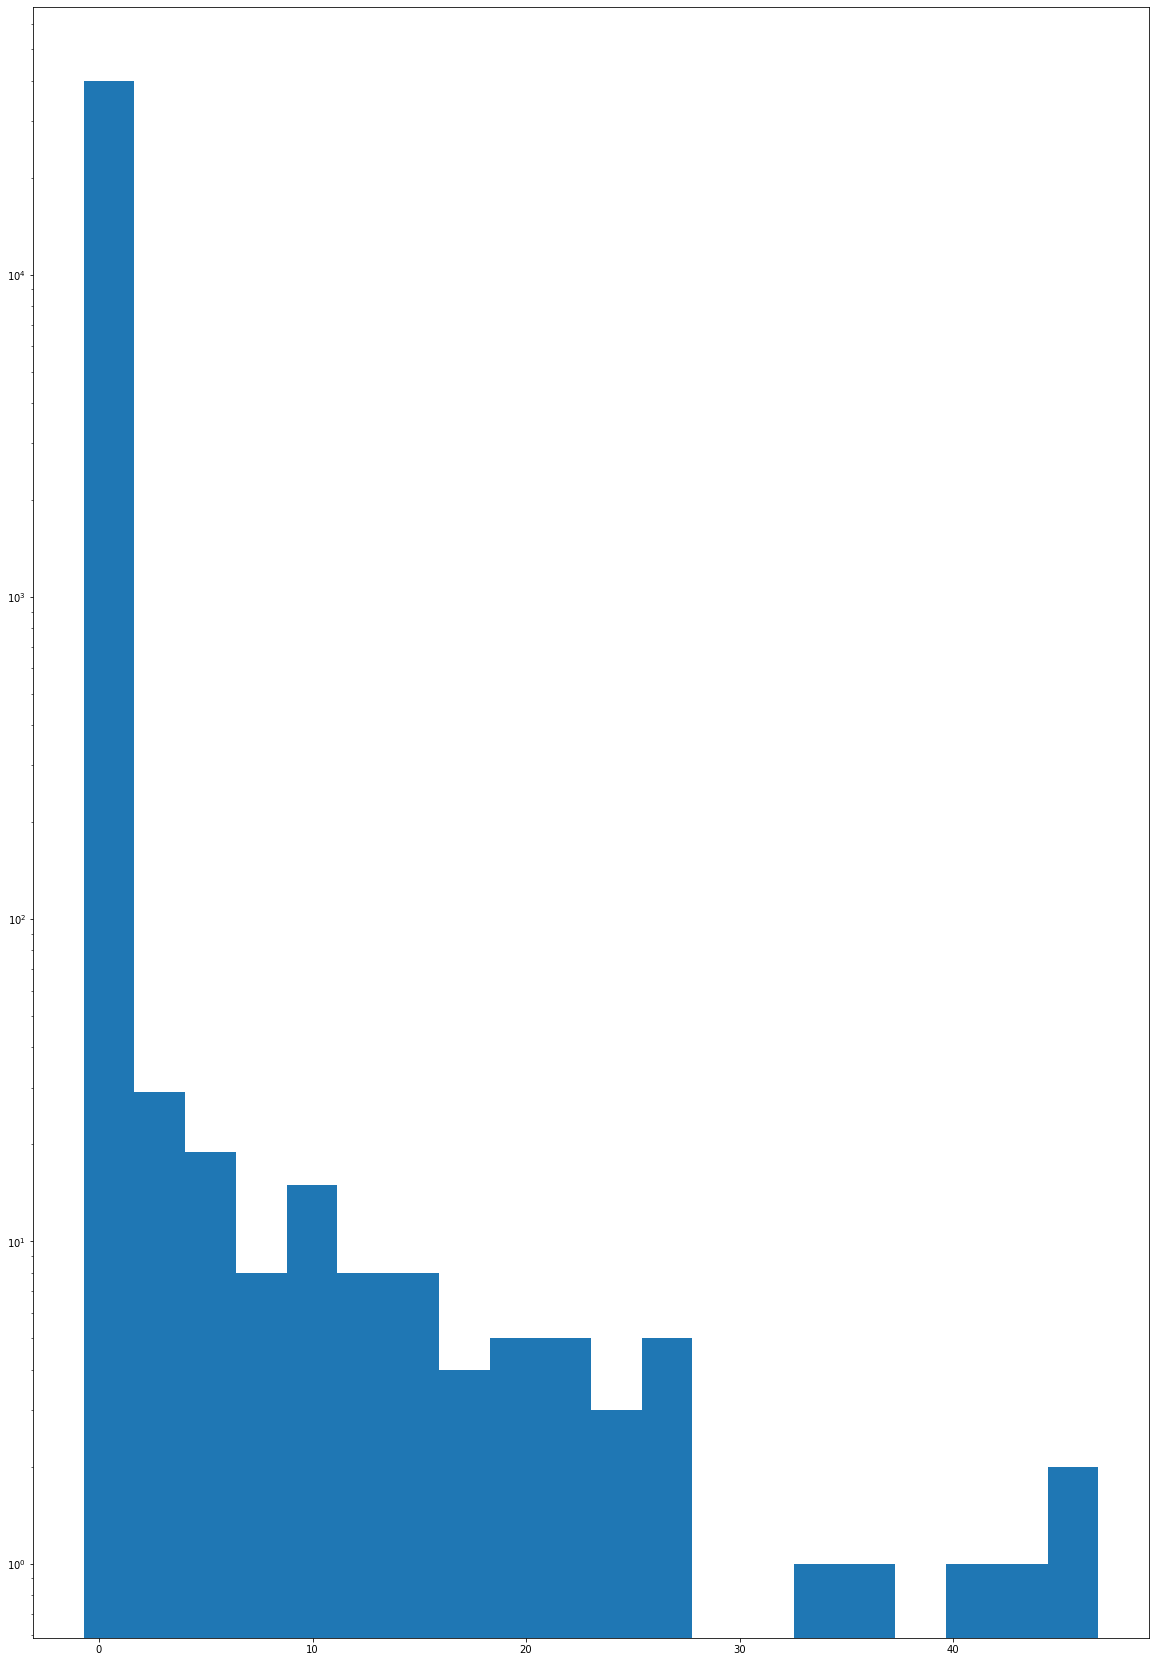

In [15]:
plt.hist(np.reshape(mean,40000), bins = 20)
plt.yscale('log')

In [64]:
st_dev = np.zeros(10)
means = np.zeros(10)
for n in range(0,10):
    st_dev[n] = np.std(np.reshape(images[:,:,n]-mean,40000))
    means[n] = np.mean(np.reshape(images[:,:,n]-mean,40000))
mean_std = np.mean(st_dev)
means = (np.mean(means))
prob = stats.norm.cdf(detection,loc = means, scale = mean_std)
sigma = stats.norm.ppf(prob)
print(sigma)

6.9042211164403255
